In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from PIL import Image

#Q1 Convolution function

In [ ]:
#Code to pad image
def image_padding(image, padding):
    img_height, img_width, channels = image.shape
    padded_image = np.zeros((img_height + 2 * padding, img_width + 2 * padding, channels))

    padded_image[padding:padding + img_height, padding:padding + img_width, :] = image

    return padded_image


In [ ]:
#Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

In [ ]:
#Convolution function

def convolution(img,kernel,stride,activation,bias=None,padding=0):

  #padding image
  padded_img = image_padding(img,padding)

  #Extracting image features
  img_height,img_width,channels = padded_img.shape

  #Extracting kernel features
  ker_height,ker_width, ker_channel = kernel.shape

  #Calculating output shape
  out_dim_height = (img_height - ker_height + 2* padding)//stride + 1
  out_dim_width =  (img_width - ker_width + 2*padding)//stride +1

  conv_output = np.zeros((out_dim_height, out_dim_width))

  for i in range(0,img_height - ker_height +1, stride):
    for j in range(0,img_width - ker_width + 1 , stride):
      for k in range(ker_channel):
       # print(i,j,k)
       #Convolution operation
        conv_output[i // stride, j // stride] += np.sum(padded_img[i:i+ker_height, j:j+ker_width, k] * kernel[:, :, k])

  if bias is not None:
    conv_output += bias

  op = activation(conv_output)

  return op






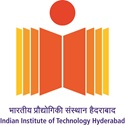

In [ ]:
iith_logo = Image.open('/content/IIT Hyderabad.jpg').convert('RGB')
iith_logo

In [ ]:
iith_image = np.array(iith_logo)
iith_image.shape

(125, 125, 3)

In [ ]:
#Kernel for edge detection
kernel = np.array([
    [[-1], [-1], [-1]],
    [[-1], [8], [-1]],
    [[-1], [-1], [1]]
])

In [ ]:
#Convolution parameters
stride = 1
padding = 0


In [ ]:
#Convolutions with different activation function
output_sigmoid = convolution(iith_image, kernel, stride, sigmoid,padding=10)
output_tanh = convolution(iith_image, kernel, stride,tanh)
output_relu = convolution(iith_image, kernel, stride,relu)
output_leaky_relu = convolution(iith_image, kernel, stride, lambda x: leaky_relu(x, alpha=0.01))

<ipython-input-3-a066f83a138e>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-3-a066f83a138e>:6: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
<ipython-input-3-a066f83a138e>:6: RuntimeWarning: invalid value encountered in divide
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


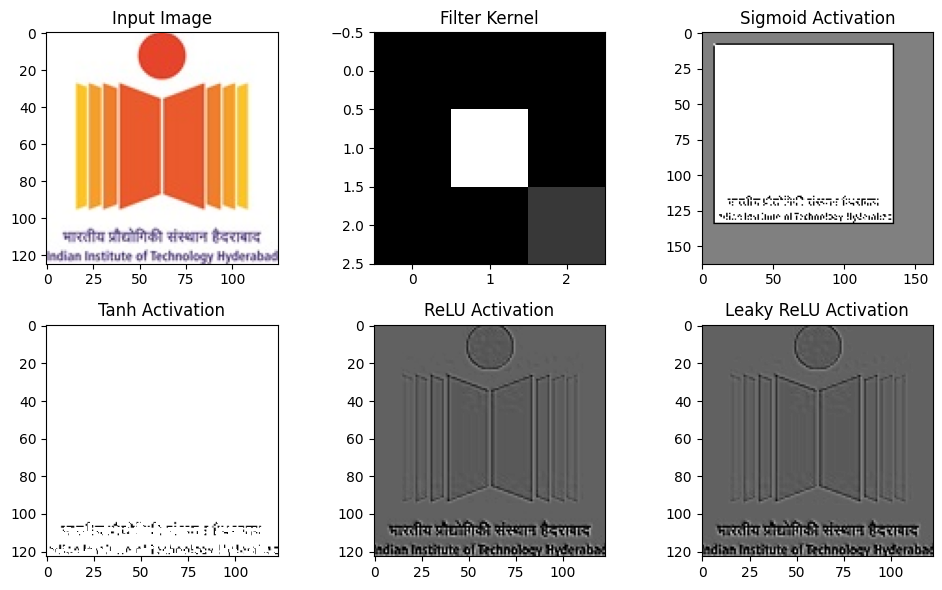

In [ ]:

# Display input image, filter kernel, and output activations
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(iith_image)
plt.title('Input Image')

plt.subplot(232)
plt.imshow(kernel[:, :, 0], cmap='gray')
plt.title('Filter Kernel')

plt.subplot(233)
plt.imshow(output_sigmoid, cmap='gray')
plt.title('Sigmoid Activation')

plt.subplot(234)
plt.imshow(output_tanh, cmap='gray')
plt.title('Tanh Activation')

plt.subplot(235)
plt.imshow(output_relu, cmap='gray')
plt.title('ReLU Activation')

plt.subplot(236)
plt.imshow(output_leaky_relu, cmap='gray')
plt.title('Leaky ReLU Activation')

plt.tight_layout()
plt.show()


**We can observe that relu and leaky relu gives better performance than sigmoid and tanh**


---






#Q2 Pooling function

In [ ]:
#Pooling function
def pooling_function(input,kernel,function="max",stride=1):
  #Extracting image features
  ip_height,ip_width = input.shape

  #Extracting kernel features
  ker_height,ker_width = kernel
  #Calculating output shape
  out_height = (ip_height - ker_height) //stride + 1
  out_width = (ip_width - ker_width) // stride + 1


  out_pool = np.zeros((out_height,out_width))

  #Pooling
  for i in range(0,(ip_height - ker_height) +1,stride):
    for j in range(0,(ip_width-ker_width)+1,stride):
      if function == 'max':
        out_pool[i//stride , j//stride] = np.max(input[i:i+ker_height,j:j+ker_width])

      elif function == 'min':
        out_pool[i//stride , j//stride] = np.min(input[i:i+ker_height,j:j+ker_width])

      elif function == 'avg':
        out_pool[i//stride , j//stride] = np.mean(input[i:i+ker_height,j:j+ker_width])

  return out_pool


In [ ]:
kernel = (2,2)
#pooling function can be max,min or avg
out_pool_leaky_relu = pooling_function(output_leaky_relu,kernel)

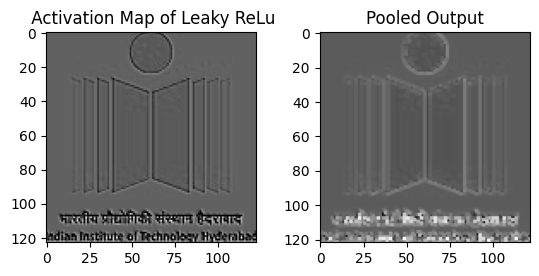

In [ ]:
#Displaying activation map and pooled output
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(output_leaky_relu, cmap='gray')
plt.title(' Activation Map of Leaky ReLu')

plt.subplot(232)
plt.imshow(out_pool_leaky_relu, cmap='gray')
plt.title('Pooled Output')
plt.show()

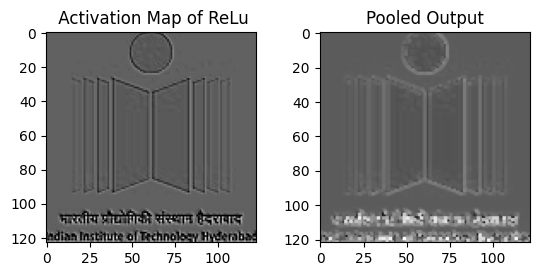

In [ ]:
#Displaying activation map and pooled output
out_pool_relu = pooling_function(output_leaky_relu,kernel)

plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.imshow(output_relu, cmap='gray')
plt.title(' Activation Map of ReLu')

plt.subplot(232)
plt.imshow(out_pool_relu, cmap='gray')
plt.title('Pooled Output')
plt.show()

#Q3 Convolution layer function

In [ ]:
#Function to display filters and activation map of convolution layer
def display_convolution_results(filters, output):
    num_filters = filters.shape[0]
    plt.figure(figsize=(15, 4))

    # Display filter kernels
    for i in range(num_filters):
        plt.subplot(1, num_filters + 2, i + 2)
        plt.imshow(filters[i, :, :, 0], cmap='gray', alpha=0.5)
        plt.title(f'Filter {i + 1}')

    # Display output activation maps
    plt.subplot(1, num_filters + 2, num_filters + 2)
    plt.imshow(output[:, :, 0], cmap='gray')
    plt.title('Output Activation Maps')

    plt.show()

In [ ]:
#Convolution layer function
def convolution_layer(img,num_filters,kernels_dim,stride,activation,padding=0,bias=None):

  kernels = np.random.rand(num_filters, kernels_dim[0],kernels_dim[1],img.shape[2])

  # Initialize bias
  if bias is not None:
    bias = np.random.randn(num_filters)
  else:
    bias = None

  #creating array for storing convolution of each filter
  activation_maps=[]

  for i in range(num_filters):
    output= convolution(img,kernels[i],stride,activation,bias[i] if bias is not None else None,padding)
    activation_maps.append(output)

  #Stacking all the output image
  activation_map = np.stack(activation_maps, axis=-1)

  out_activation = activation(activation_map)
  display_convolution_results(kernels, out_activation)
  return out_activation




In [ ]:
num_filters = 3
kernel_size = (3, 3)
stride = 1
padding = 1


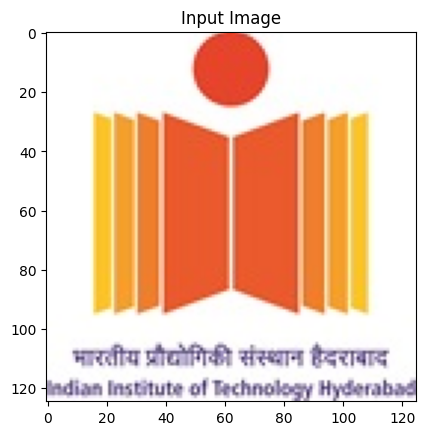

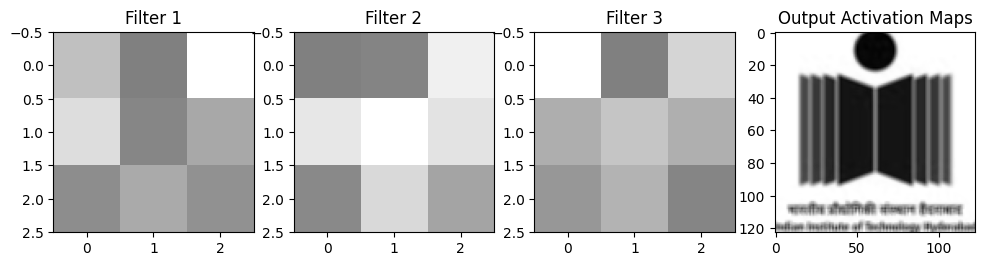

In [ ]:
# Display input img)
plt.imshow(iith_image)
plt.title('Input Image')
output_activation = convolution_layer(iith_image, num_filters, kernel_size, stride, lambda x: leaky_relu(x, alpha=0.01))


In [ ]:
output_activation.shape

(123, 123, 3)

#Q4:Pooling layer function

In [ ]:
def pooling_layer(activation_map, pooling_function='max', stride=2):
    if pooling_function == 'global_avg':
        return np.mean(activation_map, axis=(0, 1))

    # Extracting volume features
    height, width, depth = activation_map.shape

    #Pooling kernel (as kernel was not mentioned in the parameter list of function)
    kernel = (2, 2)

    # Calculating output shape
    out_height = (height - kernel[0]) // stride + 1
    out_width = (width - kernel[1]) // stride + 1


    output = np.zeros((out_height, out_width, depth))

    # Pooling
    for d in range(depth):
        for i in range(0, height - kernel[0] + 1, stride):
            for j in range(0, width - kernel[1] + 1, stride):
                if pooling_function == 'max':
                    output[i // stride, j // stride, d] = np.max(activation_map[i:i + kernel[0], j:j + kernel[1], d])
                elif pooling_function == 'min':
                    output[i // stride, j // stride, d] = np.min(activation_map[i:i + kernel[0], j:j + kernel[1], d])
                elif pooling_function == 'avg':
                    output[i // stride, j // stride, d] = np.mean(activation_map[i:i + kernel[0], j:j + kernel[1], d])

    return output

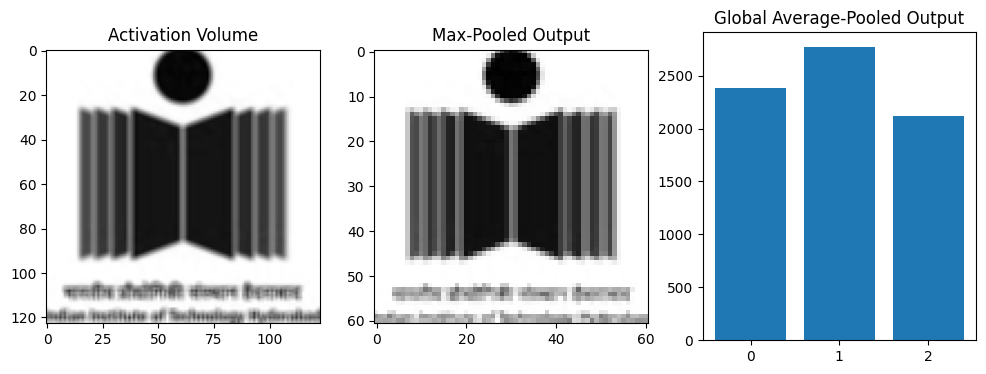

In [ ]:
#max pooling with a stride of 2
pooled_output_max = pooling_layer(output_activation, pooling_function='max', stride=2)

#global average pooling
pooled_output_global_avg = pooling_layer(output_activation, pooling_function='global_avg')


plt.figure(figsize=(12, 4))

# Displaying original activation map volume
plt.subplot(131)
plt.imshow(output_activation[:, :, 0], cmap='gray')
plt.title('Activation Volume')

# Displaying max-pooled output
plt.subplot(132)
plt.imshow(pooled_output_max[:, :, 0], cmap='gray')
plt.title('Max-Pooled Output')

# Displaying global average-pooled output
plt.subplot(133)
plt.bar(range(output_activation.shape[2]), pooled_output_global_avg)
plt.title('Global Average-Pooled Output')

plt.show()


#Q5: Multilayer Perceptron (MLP) *function*

In [ ]:
#Multilayer Perceptron (MLP)
def mlp(input, num_hidden_layers, hidden_layer_size, activation, output_size, apply_softmax=False):
    input_size = len(input)
    weights = []
    biases = []

    # Initializing weights and biases
    for i in range(num_hidden_layers):
        weights.append(np.random.randn(input_size, hidden_layer_size))
        biases.append(np.random.randn(hidden_layer_size))
        input_size = hidden_layer_size

    weights.append(np.random.randn(input_size, output_size))
    biases.append(np.random.randn(output_size))

    # Forward pass
    output = input
    for i in range(num_hidden_layers):
        output = activation(np.dot(output, weights[i]) + biases[i])
    output = np.dot(output, weights[-1]) + biases[-1]

    # Applying softmax if specified
    if apply_softmax:
        output = softmax(output)

    return output


#Q6: Putting-it all together

In [ ]:
def cnn(imgs):
    # Convolution layer with 16 kernels of size 5 × 5 spatial dimensions and ReLU activation
    conv1 = convolution_layer(imgs, num_filters=16, kernels_dim=(5, 5), stride=1, activation=relu, padding=0)

    # Max pooling layer of size 2 × 2 with a stride of 2 along each dimension
    pool1 = pooling_layer(conv1, pooling_function='max', stride=2)

    # Convolution layer with 32 kernels of spatial size 3 × 3 and sigmoid activation
    conv2 = convolution_layer(pool1, num_filters=32, kernels_dim=(3, 3), stride=1, activation=sigmoid, padding=0)

    # Max pooling layer of size 2 × 2 with a stride of 2 along each dimension
    pool2 = pooling_layer(conv2, pooling_function='max', stride=2)

    # Global Average Pooling (GAP) layer
    gap = np.mean(pool2, axis=(0, 1))

    # MLP with one hidden layer
    mlp_output = mlp(gap, num_hidden_layers=1, hidden_layer_size=len(gap), activation=relu, output_size=1000, apply_softmax=True)

    return mlp_output

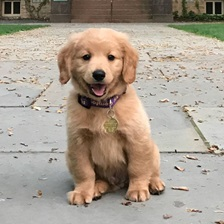

In [ ]:
dog = Image.open('/content/dog.jpg').convert('RGB')
dog

(224, 224, 3)


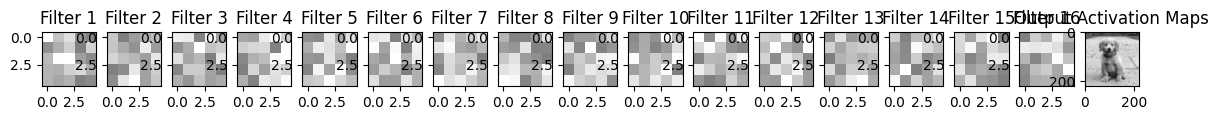

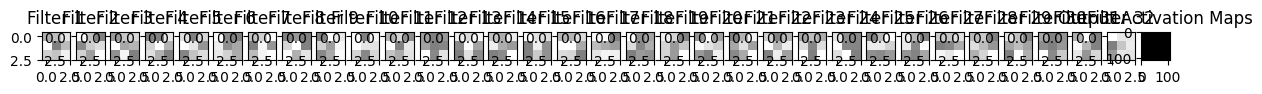

Output shape: (1000,)


In [ ]:
dog_image = np.array(dog)
print(dog_image.shape)
output = cnn(dog_image)
print("Output shape:", output.shape)

#**Q7** Elmon network

In [2]:
#Creating datapoints X and y
def create_datapoint(max_length):
  len = np.random.randint(2,max_length) #randomly selecting length of input from 2 to max_length
  index = random.sample(range(len),2) #randomly selecting two input which will have 1
  X = []

  for j in range(len):
    if j in index:
      X.append(torch.tensor([torch.rand(1).item(), 1]))
    else:
      X.append(torch.tensor([torch.rand(1).item(), 0]))

  y = sum([X[k][0] for k in index])
  y = torch.tensor([y.item()])

  return X,y

In [3]:
#Creating dataset
def create_dataset(size,max_length):
  dataset = []
  for i in range(size):
    X,y = create_datapoint(max_length)
    dataset.append((X,y))

  return dataset

In [4]:
#Loss function
def loss_function(y_pred, y):
    return torch.mean((y_pred - y)**2) #using MSE as loss function in all 3 RNN's

In [5]:
# Initializing elmon rnn weights
def initialize_elmon_parameters(input_size, hidden_size, output_size):
    weights_input_hidden = torch.randn(hidden_size, input_size, requires_grad=True)
    weights_hidden_hidden = torch.randn(hidden_size, hidden_size, requires_grad=True)
    bias_hidden = torch.zeros(hidden_size, requires_grad=True)
    weights_hidden_output = torch.randn(output_size, hidden_size, requires_grad=True)
    bias_output = torch.zeros(output_size, requires_grad=True)

    return weights_input_hidden, weights_hidden_hidden, bias_hidden, weights_hidden_output, bias_output

In [6]:
#Forward pass
def forward_pass(X, parameters):
    weights_input_hidden, weights_hidden_hidden, bias_hidden, weights_hidden_output, bias_output = parameters
    # print(weights_hidden_hidden)
    hidden = torch.zeros(hidden_size)
    for u in X:
        op = weights_input_hidden @ u + weights_hidden_hidden @ hidden + bias_hidden
        hidden = torch.tanh(op.t())
    output = weights_hidden_output @ hidden.t() + bias_output

    return output


In [7]:
#Training elmon rnn
def train_elmon_rnn(train, parameters, learning_rate, epochs):
    losses = []
    optimizer = optim.Adam(parameters, lr=learning_rate)

    for epoch in range(epochs):
      ep_loss = 0.0

      for X, y in train:
        # Forward pass
        output = forward_pass(X, parameters)

        # Calculating loss
        loss = loss_function(output, y)
        optimizer.zero_grad()

        #Backpropagating
        loss.backward()
        optimizer.step()
        ep_loss += loss.item()

      l= ep_loss / len(train)
      print(f"Loss after epoch {epoch} : {l}")
      losses.append(l)

    return losses

In [8]:
#Tesing elmon rnn
def test_elmon_rnn(test_dataset, parameters):
    losses = []

    for X_test, y_test in test_dataset:
        with torch.no_grad():
            output_test = forward_pass(X_test, parameters)
            loss = loss_function(output_test, y_test).item()

    average_loss = sum(losses) / len(test_dataset)
    print(f"Average Test Loss: {average_loss}")
    return average_loss


In [9]:
#Creating dataset
train_dataset = create_dataset(5000,30)
test_dataset = create_dataset(1500,10)

learning_rate = 0.001
epochs = 3
input_size=2
hidden_size=5
output_size=1
parameters = initialize_elmon_parameters(2,5,1)

# Training
elmon_train_loss = train_elmon_rnn(train_dataset, parameters, learning_rate, epochs)

#Testing
elmon_test_loss = test_elmon_rnn(test_dataset, parameters)


Loss after epoch 0 : 0.22457149381758373
Loss after epoch 1 : 0.16145940457294783
Loss after epoch 2 : 0.15997337342207613
Average Test Loss: 0.0


#**LSTM**

In [10]:
#initializing lstm parameters
def initialize_lstm_parameters(input_size, hidden_size, output_size):

    #weights fot forget gate
    weights_input_forget = torch.randn(hidden_size, input_size, requires_grad=True)
    weights_hidden_forget = torch.randn(hidden_size, hidden_size, requires_grad=True)
    bias_forget = torch.zeros(hidden_size, requires_grad=True)

    #weights forinput gate
    weights_input = torch.randn(hidden_size, input_size, requires_grad=True)
    weights_input_hidden = torch.randn(hidden_size, hidden_size, requires_grad=True)
    bias_input = torch.zeros(hidden_size, requires_grad=True)

    #weights for cell
    weights_cell = torch.randn(hidden_size, input_size, requires_grad=True)
    weights_cell_hidden = torch.randn(hidden_size, hidden_size, requires_grad=True)
    bias_cell = torch.zeros(hidden_size, requires_grad=True)

    #weights for output gate
    weights_op = torch.randn(hidden_size, input_size, requires_grad=True)
    weights_op_hidden = torch.randn(hidden_size, hidden_size, requires_grad=True)
    bias_op = torch.zeros(hidden_size, requires_grad=True)

    #weights for output layer
    weights_hidden_op = torch.randn(output_size, hidden_size, requires_grad=True)
    bias_op_layer = torch.zeros(output_size, requires_grad=True)

    return weights_input_forget, weights_hidden_forget, bias_forget, weights_input, weights_input_hidden, bias_input, weights_cell, weights_cell_hidden, bias_cell, weights_op, weights_op_hidden, bias_op, weights_hidden_op, bias_op_layer


In [11]:
#Forward pass
def forward_pass_lstm(inputs, parameters):
    weights_input_forget, weights_hidden_forget, bias_forget, weights_input, weights_input_hidden, bias_input, weights_cell, weights_cell_hidden, bias_cell, weights_op, weights_op_hidden, bias_op, weights_hidden_op, bias_op_layer= parameters

    hidden_state = torch.zeros(weights_input_forget.size(0))
    cell_state = torch.zeros(weights_input_forget.size(0))

    for input in inputs:
        forget_gate = torch.sigmoid(weights_input_forget @ input + weights_hidden_forget @ hidden_state + bias_forget)
        input_gate = torch.sigmoid(weights_input @ input + weights_input_hidden @ hidden_state + bias_input)
        cd_cell_state = torch.tanh(weights_cell @ input + weights_cell_hidden @ hidden_state + bias_cell)
        output_gate = torch.sigmoid(weights_op @ input + weights_op_hidden @ hidden_state + bias_op)

        cell_state = forget_gate * cell_state + input_gate * cd_cell_state
        hidden_state = output_gate * torch.tanh(cell_state)

    output = weights_hidden_op @ hidden_state + bias_op_layer
    return output

In [12]:
#Train model
def train_lstm(dataset, parameters, epochs, learning_rate=0.01):
    optimizer = torch.optim.Adam(parameters, lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        ep_loss = 0.0
        for X, y in dataset:
            optimizer.zero_grad()
            #Forward pass
            output = forward_pass_lstm(X, parameters)
            loss = loss_function(output, y)
            #Backpropagation
            loss.backward()
            optimizer.step()
            ep_loss += loss.item()

        l= ep_loss / len(dataset)
        print(f"Loss after epoch {epoch} : {l}")
        losses.append(l)

    return losses



In [13]:
#Test model
def test_lstm(dataset, parameters):
    total_loss = 0.0

    for X, y in dataset:
        output = forward_pass_lstm(X, parameters)
        loss = loss_function(output, y)
        total_loss += loss.item()

    return total_loss / len(dataset)

In [14]:
num_epochs = 3
learning_rate = 0.001

lstm_parameters = initialize_lstm_parameters(input_size=2, hidden_size=5, output_size=1)
lstm_train_loss = train_lstm(train_dataset, lstm_parameters, num_epochs, learning_rate)
lstm_test_loss = test_lstm(test_dataset, lstm_parameters)

# print("Training Losses:", lstm_losses)
# print("Test Loss:", test_loss)


Loss after epoch 0 : 0.1539652884068656
Loss after epoch 1 : 0.05057426074554701
Loss after epoch 2 : 0.021116089400166852


#**GRU**

In [15]:
# GRU Model
def initialize_gru_weights(hidden_dim, input_dim, output_dim):
    #Update gate weights
    weights_ip_update = torch.randn(hidden_dim, input_dim, requires_grad=True)
    weights_hidden_update = torch.randn(hidden_dim, hidden_dim, requires_grad=True)
    bias_update = torch.randn(hidden_dim, requires_grad=True)

    #Reset gate weights
    weights_reset = torch.randn(hidden_dim, input_dim, requires_grad=True)
    weights_hidden_reset = torch.randn(hidden_dim, hidden_dim, requires_grad=True)
    bias_reset = torch.randn(hidden_dim, requires_grad=True)

    #Hidden state weights
    weights_hidden = torch.randn(hidden_dim, input_dim, requires_grad=True)
    weights_hidden_hidden = torch.randn(hidden_dim, hidden_dim, requires_grad=True)
    bias_hidden = torch.randn(hidden_dim, requires_grad=True)

    #output weights
    weights_hidden_op = torch.randn(output_dim, hidden_dim, requires_grad=True)
    bias_op = torch.randn(output_dim, requires_grad=True)

    return weights_ip_update, weights_hidden_update, bias_update, weights_reset, weights_hidden_reset, bias_reset, weights_hidden, weights_hidden_hidden, bias_hidden, weights_hidden_op, bias_op


In [16]:
def gru_forward_pass(inputs, parameters):
    weights_ip_update, weights_hidden_update, bias_update, weights_reset, weights_hidden_reset, bias_reset, weights_hidden, weights_hidden_hidden, bias_hidden, weights_hidden_op, bias_op= parameters
    hidden_dim = weights_ip_update.size(0)

    hidden_state = torch.zeros(hidden_dim)

    for input in inputs:
        update_gate = torch.sigmoid(weights_ip_update @ input + weights_hidden_update @ hidden_state + bias_update)
        reset_gate = torch.sigmoid(weights_reset @ input + weights_hidden_reset @ hidden_state + bias_reset)
        candidate_hidden_state = torch.tanh(weights_hidden @ input + weights_hidden_hidden @ (reset_gate * hidden_state) + bias_hidden)

        hidden_state = (1 - update_gate) * hidden_state + update_gate * candidate_hidden_state

    output = weights_hidden_op @ hidden_state + bias_op
    return output

In [17]:
#Training GRU
def train_gru(dataset, parameters, num_epochs, learning_rate=0.01):
    optimizer = optim.Adam(parameters, lr=learning_rate)
    losses = []

    for epoch in range(num_epochs):
        ep_loss = 0.0

        # Compute and backpropagate the loss for every data sample
        for X, y in dataset:
            optimizer.zero_grad()
            #Forward pass
            output = gru_forward_pass(X, parameters)
            loss = loss_function(output, y)
            #Backpropogate
            loss.backward()
            optimizer.step()
            ep_loss += loss.item()

        l= ep_loss / len(dataset)
        print(f"Loss after epoch {epoch} : {l}")
        losses.append(l)

    return losses

In [18]:
#Testing GRU
def test_gru(dataset, parameters):
    total_loss = 0.0
    for X, y in dataset:
        output = gru_forward_pass(X, parameters)
        loss = loss_function(output, y)
        total_loss += loss.item()
    return total_loss / len(dataset)

In [19]:
gru_parameters = initialize_gru_weights(hidden_dim=5, input_dim=2, output_dim=1)
#Training GRU
epochs =3
gru_train_loss = train_gru(train_dataset,gru_parameters, epochs, learning_rate=0.01)

# Testing GRU
gru_test_loss = test_gru(test_dataset, gru_parameters)



Loss after epoch 0 : 0.11932256397219858
Loss after epoch 1 : 0.002963631302178488
Loss after epoch 2 : 0.001567753785099406


In [20]:
def baseline_pred(input, pred=1.0):
    return torch.tensor([pred])


In [21]:
def baseline(baseline_pred_func, dataset):
    total_loss = 0.0
    for X, y in dataset:
        output = baseline_pred_func(X)
        loss = loss_function(output, y)
        total_loss += loss.item()

    return total_loss / len(dataset)

In [29]:
baseline_test_loss = baseline(lambda x: baseline_pred(x, pred=1.0), test_dataset)
baseline_train_loss = baseline(lambda x: baseline_pred(x, pred=1.0), train_dataset)

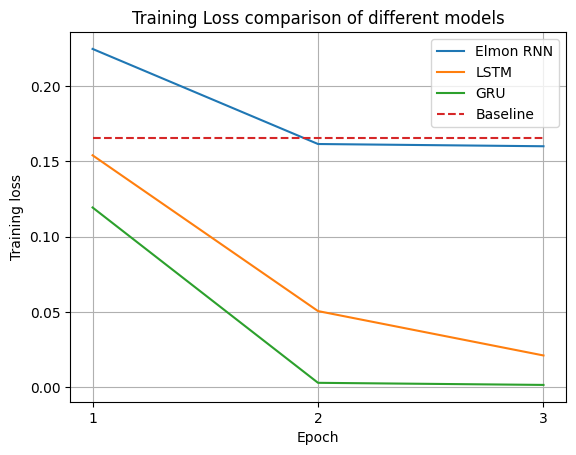

In [30]:
#Comparing train loss
plt.plot(range(1, epochs+1), elmon_train_loss, label='Elmon RNN')
plt.plot(range(1, epochs+1), lstm_train_loss, label='LSTM')
plt.plot(range(1, epochs+1), gru_train_loss, label='GRU')
plt.plot(range(1, epochs+1), [baseline_train_loss] * epochs, '--', label='Baseline')

plt.title('Training Loss comparison of different models')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.xticks(range(1, epochs+1))
plt.legend()
plt.grid()

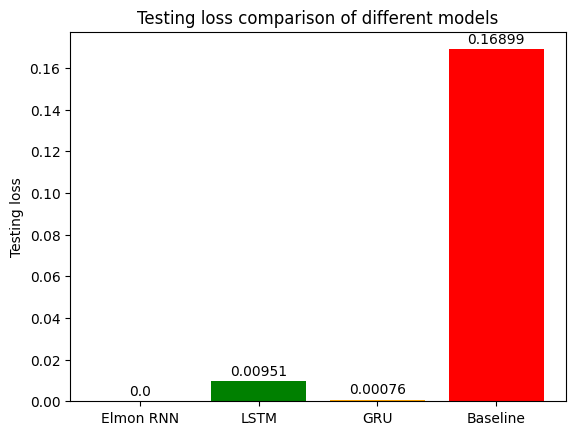

In [33]:
#Comparing test loss
models = ['Elmon RNN', 'LSTM', 'GRU', 'Baseline']
loss_list = [elmon_test_loss, lstm_test_loss, gru_test_loss, baseline_test_loss]

plt.bar(models, loss_list, color=['blue', 'green', 'orange', 'red'])
plt.title('Testing loss comparison of different models')
plt.ylabel('Testing loss')

# Display the loss value above the respective bar
for index, value in enumerate(loss_list):
  plt.text(index, value + 0.003, str(round(value, 5)), ha='center')